In [2]:
#Support Vector Machine - What is the maximum value between two things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\Matthew\Documents\CS4375')
path = os.getcwd()

In [3]:
'''
The data simulates a medical study in which mice were infected with a virus; given doses of two types of 
medicine; checking back in 2 weeks to see if they were still infected. We will create a classification model
to predict if they will still be infected.
'''
df = pd.read_csv("mouse_viral_study.csv")

In [4]:
#Shows amount of medicine 1 and medicine 2 and if the virus was present after
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

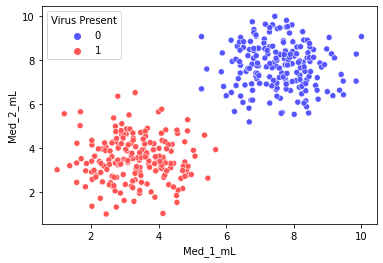

In [5]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df, palette = "seismic")

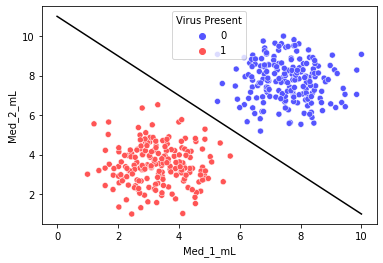

In [6]:
#The goal of SVM is to create the best seperating hyperplance; in 2D is a line
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df, palette = "seismic")
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, "k")

#The line seperates whether or not if you will have the virus

In [8]:
from sklearn.svm import SVC #Support vector classifier

In [9]:
help(SVC)
#C is regulirization classifier, kernel we can use linear, poly, rbf, etc.

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [10]:
y = df["Virus Present"]
X = df.drop("Virus Present", axis = 1)

In [11]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


In [13]:
"""
C: Regularization parameter. The penalty is L2 penalty in this model. The strength of regularization is inversly proportional to C
"""
#Using linear
model = SVC(kernel = "linear", C=0.5)
model.fit(X, y)

SVC(C=0.5, kernel='linear')

In [14]:
from svm_margin_plot import plot_svm_boundary

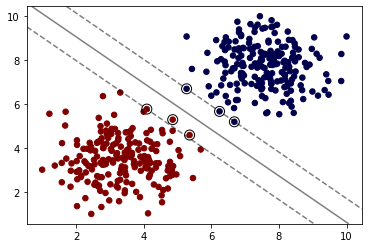

In [15]:
#Main line is hyperplane
plot_svm_boundary(model, X, y)

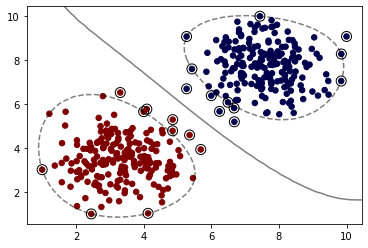

In [16]:
#Using RBF instead (Radial based)
model = SVC(kernel = "rbf", C=0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

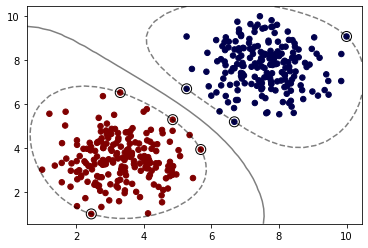

In [17]:
#Changing C (the bigger the C the less points will be used)
model = SVC(kernel = "rbf", C=100)
model.fit(X, y)
plot_svm_boundary(model, X, y)

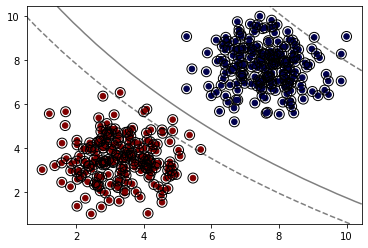

In [19]:
#Using sigmoid
model = SVC(kernel = "sigmoid")
model.fit(X, y)
plot_svm_boundary(model, X, y)

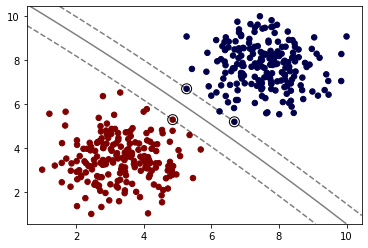

In [22]:
#Using poly
model = SVC(kernel = "poly", C = 1, degree = 3)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [29]:
#We don't know which C is the best, which kernel is the best, we can use gridsearch to find the best possibility
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {"C":[0.01, 0.1, 1], "kernel": ["linear", "rbf", "sigmoid", "poly"], "degree": [1, 2, 3]}
grid = GridSearchCV(svm, param_grid)

In [30]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [31]:
grid.best_score_

1.0

In [32]:
#Show the parameters that gave the best results
grid.best_params_

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}